In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from scipy.optimize import minimize

### Portfolio of Domestic Stocks

In [2]:
JYOTHILAB = yf.download("JYOTHYLAB.NS",start='2023-04-01',end='2024-03-31')

AJANTPHARM = yf.download("AJANTPHARM.NS",start='2023-04-01',end='2024-03-31')

PATANJALI = yf.download("PATANJALI.NS",start='2023-04-01',end='2024-03-31')

TATASTEEL = yf.download("TATASTEEL.NS",start='2023-04-01',end='2024-03-31')

EIDPARRY = yf.download("EIDPARRY.NS",start='2023-04-01',end='2024-03-31')

GLS = yf.download("GLS.NS",start='2023-04-01',end='2024-03-31')

INDIACEM = yf.download("INDIACEM.NS",start='2023-04-01',end='2024-03-31')


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [3]:
portfolio_list = [JYOTHILAB,AJANTPHARM,PATANJALI,TATASTEEL,EIDPARRY,GLS,INDIACEM]
portfolio_dict = {'JYOTHILAB':JYOTHILAB,'AJANTPHARM':AJANTPHARM,'PATANJALI':PATANJALI,
                  'TATASTEEL':TATASTEEL,'EIDPARRY':EIDPARRY,'GLS':GLS,'INDIACEM':INDIACEM}

-----------------------

### Returns Analysis of the Domestic Portfolio
-----------

In [4]:
INDIACEM

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-04-03,185.199997,188.449997,184.250000,187.149994,187.149994,1723077
2023-04-05,187.199997,188.199997,185.250000,187.449997,187.449997,961949
2023-04-06,186.199997,189.699997,185.600006,187.699997,187.699997,2460146
2023-04-10,188.800003,189.899994,185.899994,186.949997,186.949997,1331545
2023-04-11,187.899994,190.899994,187.350006,188.949997,188.949997,1348089
...,...,...,...,...,...,...
2024-03-21,198.350006,205.000000,198.350006,203.699997,203.699997,2188071
2024-03-22,203.699997,209.550003,202.399994,207.050003,207.050003,2367242
2024-03-26,205.000000,211.149994,205.000000,209.149994,209.149994,2239740


#### Start and End Date of Portfolio

In [5]:
print(GLS.index.max())
print(GLS.index.min())

2024-03-28 00:00:00
2023-04-03 00:00:00


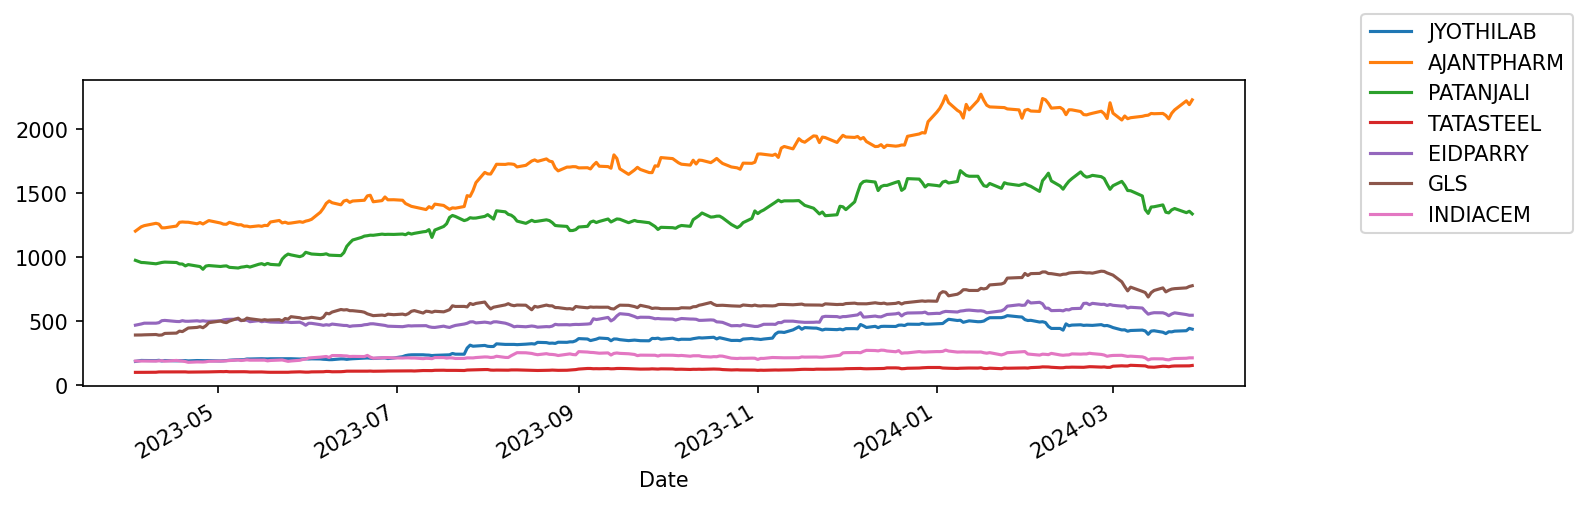

In [6]:
def plot_portfolio_adj_close(portfolio_dict):

    fig, ax = plt.subplots(dpi=150, figsize=(10, 3))
    
    for stock_name, stock_df in portfolio_dict.items():
        stock_df['Adj Close'].plot(ax=ax, label=stock_name)
    
    plt.legend(loc=(1.1, 0.5))
    plt.show()

plot_portfolio_adj_close(portfolio_dict)

#### Histogram of the daily returns for each stock in the portfolio

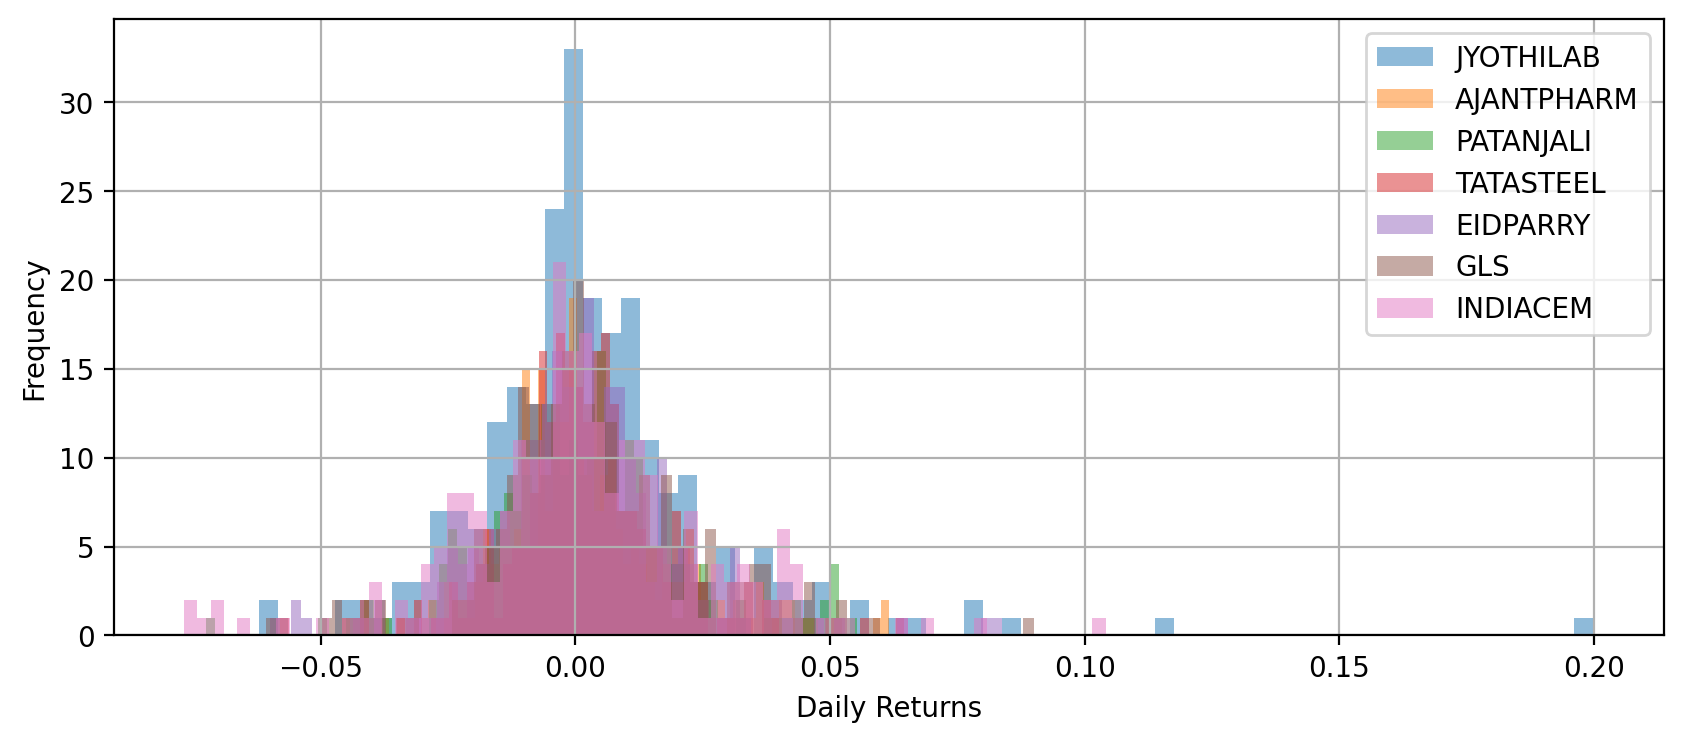

In [7]:
def plot_daily_returns_histogram(portfolio):
 
    plt.figure(dpi=200, figsize=(10, 4))

    for stock_name, stock_df in portfolio.items():
            stock_df['Adj Close'].pct_change(1).hist(label=stock_name, alpha=0.5, bins=70)
    
    plt.xlabel("Daily Returns")
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()

plot_daily_returns_histogram(portfolio_dict)

#### Calculating individual company's Sharpe ratio

In [9]:
def compute_sharpe_ratio(data, risk_free_rate = 0.000249931):
    mean_return = data["Adj Close"].pct_change(1).mean()
    std = data["Adj Close"].pct_change(1).std()
    sharpe_ratio = (mean_return-risk_free_rate) / std
    return (252**0.5) *sharpe_ratio

In [10]:
for ticker,df in portfolio_dict.items():
    print(f"{ticker} Annualized Sharpe Ratio is: {compute_sharpe_ratio(df)}")

JYOTHILAB Annualized Sharpe Ratio is: 2.2086387773045066
AJANTPHARM Annualized Sharpe Ratio is: 2.217474466132005
PATANJALI Annualized Sharpe Ratio is: 1.0254391355743435
TATASTEEL Annualized Sharpe Ratio is: 1.7560826673511805
EIDPARRY Annualized Sharpe Ratio is: 0.4765823274791384
GLS Annualized Sharpe Ratio is: 2.2032699092406585
INDIACEM Annualized Sharpe Ratio is: 0.3710249603137888
